In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 10)

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df1 = df.drop(['area_type', 'society', 'balcony', 'availability'], axis = 'columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df2.shape

(13246, 5)

In [9]:
df2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [10]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\Siddharth's ACER\AppData\Local\Temp\ipykernel_1412\1142257054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


In [12]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [13]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [14]:
df2[df2.bhk > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [15]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [17]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [18]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [19]:
convert_sqft_to_num('2166')

2166.0

In [20]:
convert_sqft_to_num('2100 - 2850')

2475.0

In [21]:
convert_sqft_to_num('34.465q. Meter')

In [22]:
df2['total_sqft'] = df2['total_sqft'].apply(convert_sqft_to_num)
df2.head(3)

C:\Users\Siddharth's ACER\AppData\Local\Temp\ipykernel_1412\136557830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_sqft'] = df2['total_sqft'].apply(convert_sqft_to_num)


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [23]:
df2

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [24]:
df2.total_sqft.unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [25]:
df2.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [26]:
df3 = df2.copy()
df3['price_per_sqft'] = df3['price'] * 100000 / df3['total_sqft']
df3.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [27]:
df3.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [28]:
len(df3.location.unique())

1304

In [29]:
df3.location = df3.location.apply(lambda x:x.strip())
location_stats = df3.groupby('location')['location'].agg('count')

In [30]:
location_stats

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1293, dtype: int64

In [31]:
location_stats.sort_values(ascending=False)

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [32]:
len(location_stats[location_stats <= 10])

1052

In [33]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10.sort_values(ascending=False)

location
Sector 1 HSR Layout     10
Dairy Circle            10
Sadashiva Nagar         10
Nagadevanahalli         10
Naganathapura           10
                        ..
KG Halli                 1
KHB Colony Extension     1
KPC Layout               1
Kalasipalya              1
whitefiled               1
Name: location, Length: 1052, dtype: int64

In [34]:
len(df3.location.unique())

1293

In [35]:
df3.location = df3.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [36]:
df3

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [37]:
len(df3.location.unique())

242

In [38]:
df3[df3.total_sqft/df3.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [39]:
df3.shape

(13246, 7)

In [40]:
df4 = df3[~(df3.total_sqft/df3.bhk<300)]
df4.shape

(12502, 7)

In [41]:
df4.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [42]:
# To remove extreme price case as shown above with large difference in min and max price_per_sqft
# ( price-per-sqft > mean - standard deviation ) & ( price-per-sqft <= mean + standard deviation )
# The above condition if gets statisfied then they are added separately into a new dataframe

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[ ( subdf.price_per_sqft > (m - st) ) & (subdf.price_per_sqft <= (m + st) ) ]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    
    return df_out

df5 = remove_pps_outliers(df4)
df5.shape

(10241, 7)

In [43]:
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
10236,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
10237,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10238,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
10239,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


In [44]:
# Explanation Part for above function - To see the actual implementation, uncomment the commands

In [45]:
# df6 = df4.groupby('location')
# df6.first()

In [46]:
# df6.get_group('1st Block Jayanagar')

In [47]:
# for i, k in df4.groupby('location'):
#     print(i, np.mean(k.price_per_sqft), np.std(k.price_per_sqft), sep=' ')
# #     print(k[(k.price_per_sqft > (np.mean(k.price_per_sqft) - np.std(k.price_per_sqft)))].head())
# #     print(i)
# #     print(k)

In [48]:
# df4.loc[[210]]

In [49]:
# for i, k in df4.groupby('location'):
# #     print(i, np.mean(k.price_per_sqft), np.std(k.price_per_sqft), sep=' ')
#     print(k[(k.price_per_sqft > (np.mean(k.price_per_sqft) - np.std(k.price_per_sqft)))])
# #     print(i)
# #     print(k)

In [50]:
# 12359.253757566757 - 3730.1654195657898

In [51]:
# 15017.543860 - (12359.253757566757 - 3730.1654195657898)

In [52]:
# df_out1 = pd.DataFrame()
# for i, k in df4.groupby('location'):
# #     print(i, np.mean(k.price_per_sqft), np.std(k.price_per_sqft), sep=' ')
#     k1 = k[(k.price_per_sqft > (np.mean(k.price_per_sqft) - np.std(k.price_per_sqft))) & (k.price_per_sqft <= (np.mean(k.price_per_sqft) + np.std(k.price_per_sqft)))]
#     df_out1 = pd.concat([df_out1, k1], ignore_index=True)
    
# df_out1
# #     print(i)
# #     print(k)

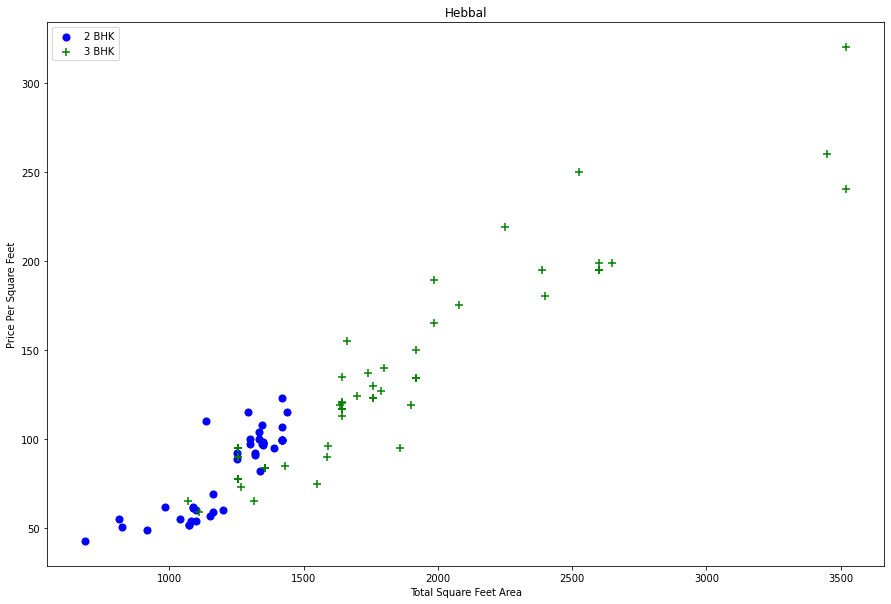

In [53]:
def plt_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label = '2 BHK', s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker = '+', color = 'green', label = '3 BHK', s = 50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price Per Square Feet')
    plt.title(location)
    plt.legend()
    
plt_scatter_chart(df5, 'Hebbal')  

In [54]:
# bhk2 = df5[(df5.location == 'Rajaji Nagar') & (df5.bhk == 2)]
# bhk2

In [55]:
# We should also remove properties where for same location, the price of 3 BHK is less than 2 BHK. For this we will build a dictionary
# of stats per bhk, i.e - 

# {
#     '1' : {
#         'mean' : 4000,
#         'std' : 2000,
#         'count' : 34,
#     },
    
#     '2' : {
#         'mean' : 4300,
#         'std' : 2300,
#         'count' : 22
#     },
# }
# Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean_price_per_sqft of 1 BHK apartmnet

In [56]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
            
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    
    return df.drop(exclude_indices, axis = 'index')

df6 = remove_bhk_outliers(df5)
df6.shape

(7329, 7)

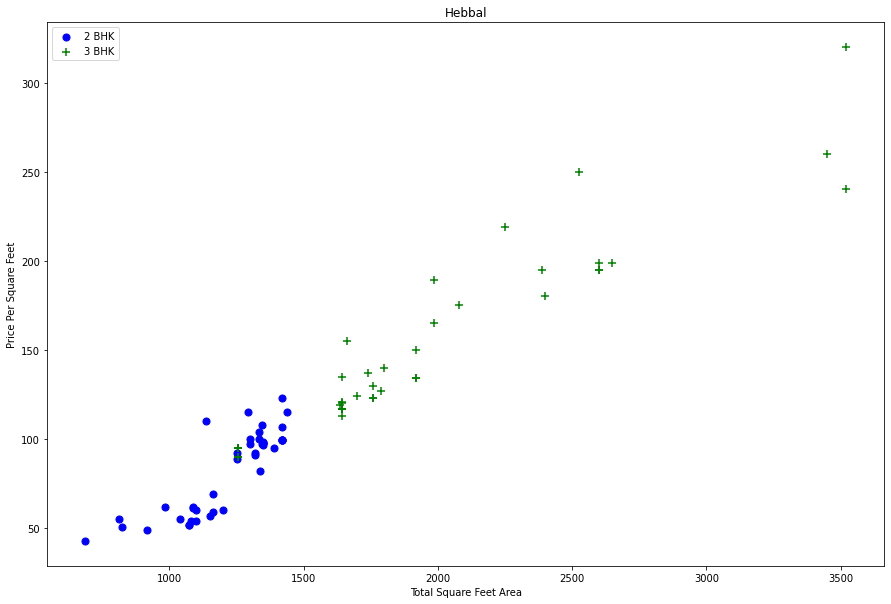

In [57]:
def plt_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label = '2 BHK', s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker = '+', color = 'green', label = '3 BHK', s = 50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price Per Square Feet')
    plt.title(location)
    plt.legend()
    
plt_scatter_chart(df6, 'Hebbal')  

Text(0, 0.5, 'Count')

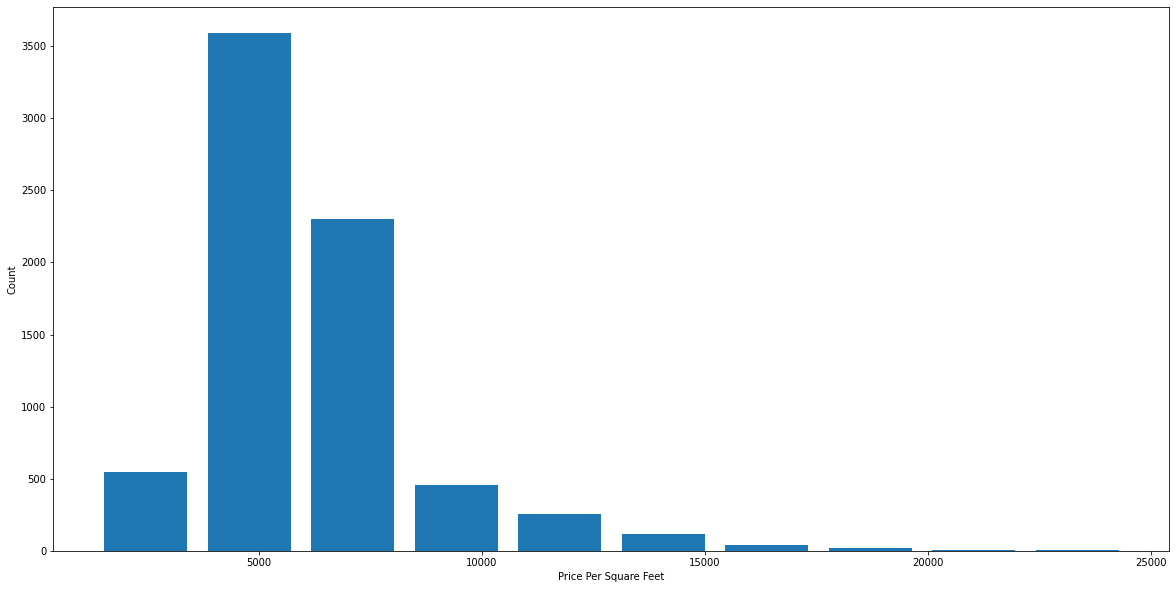

In [58]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 10)
plt.hist(df6.price_per_sqft, rwidth=0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

In [59]:
df6

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10232,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10233,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10236,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10237,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


In [60]:
df6.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [61]:
df6[df6.bath > 10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

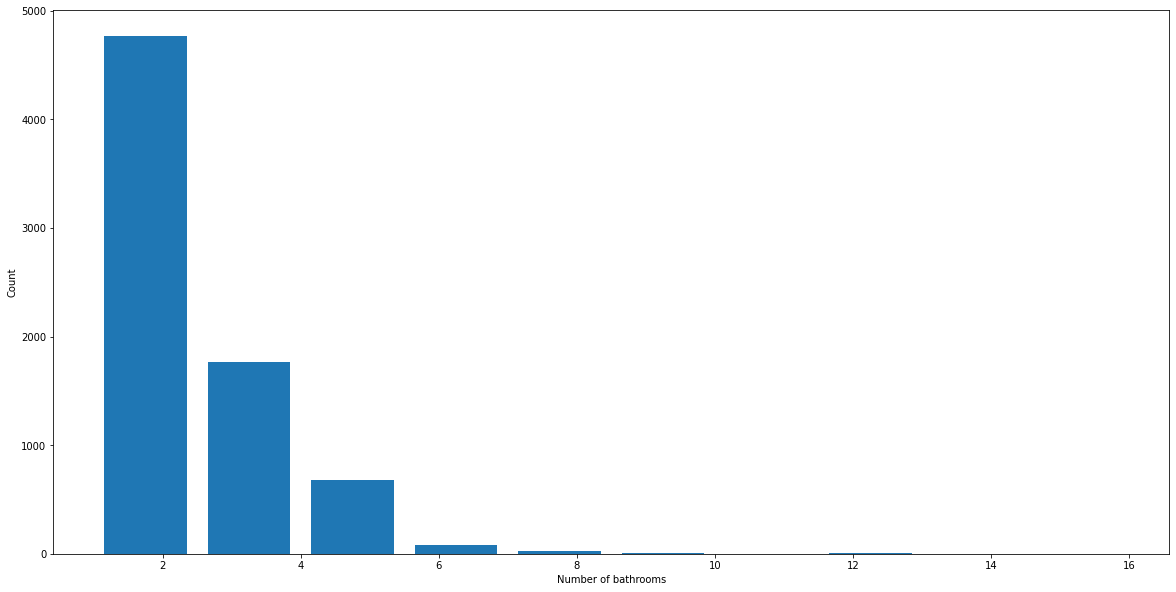

In [62]:
plt.hist(df6.bath, rwidth=0.8)
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')

In [63]:
df6[df6.bath > df6.bhk + 2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [64]:
df7 = df6[df6.bath < df6.bhk + 2]
df7.shape

(7251, 7)

In [65]:
for i, loc in df7.groupby('location'):
    for j, k in loc.groupby('bhk'):
        print(k)
#     print(i, loc, sep = ' ')
# 'Hebbal'.groupby('bhk')

              location   size  total_sqft  bath  price  bhk  price_per_sqft
4  1st Block Jayanagar  2 BHK      1235.0   2.0  148.0    2    11983.805668
              location   size  total_sqft  bath  price  bhk  price_per_sqft
1  1st Block Jayanagar  3 BHK      1630.0   3.0  194.0    3    11901.840491
2  1st Block Jayanagar  3 BHK      1875.0   2.0  235.0    3    12533.333333
3  1st Block Jayanagar  3 BHK      1200.0   2.0  130.0    3    10833.333333
              location   size  total_sqft  bath  price  bhk  price_per_sqft
0  1st Block Jayanagar  4 BHK      2850.0   4.0  428.0    4    15017.543860
5  1st Block Jayanagar  4 BHK      2750.0   4.0  413.0    4    15018.181818
6  1st Block Jayanagar  4 BHK      2450.0   4.0  368.0    4    15020.408163
              location   size  total_sqft  bath  price  bhk  price_per_sqft
16  1st Phase JP Nagar  1 BHK       840.0   2.0   50.0    1     5952.380952
              location       size  total_sqft  bath  price  bhk  \
13  1st Phase JP Naga

429  Anandapura      2 BHK      1141.0   2.0  50.00    2     4382.120947
       location       size  total_sqft  bath  price  bhk  price_per_sqft
426  Anandapura  3 Bedroom      1200.0   2.0   66.0    3     5500.000000
427  Anandapura  3 Bedroom      1415.0   2.0   74.0    3     5229.681979
       location       size  total_sqft  bath  price  bhk  price_per_sqft
420  Anandapura  4 Bedroom      1749.0   4.0   90.0    4     5145.797599
         location   size  total_sqft  bath  price  bhk  price_per_sqft
431  Ananth Nagar  1 BHK       500.0   1.0   14.0    1          2800.0
434  Ananth Nagar  1 BHK       500.0   2.0   14.0    1          2800.0
440  Ananth Nagar  1 BHK       500.0   1.0   14.0    1          2800.0
454  Ananth Nagar  1 BHK       500.0   1.0   14.0    1          2800.0
         location   size  total_sqft  bath  price  bhk  price_per_sqft
432  Ananth Nagar  2 BHK      1100.0   2.0  31.50    2     2863.636364
433  Ananth Nagar  2 BHK       982.0   2.0  24.55    2     2500.0

791     5039.830508  
                  location   size  total_sqft  bath   price  bhk  \
792  Banashankari Stage VI  3 BHK      1423.0   2.0  71.730    3   
793  Banashankari Stage VI  3 BHK      1392.0   3.0  69.460    3   
794  Banashankari Stage VI  3 BHK      1410.5   2.0  70.385    3   

     price_per_sqft  
792     5040.758960  
793     4989.942529  
794     4990.074442  
                  location       size  total_sqft  bath  price  bhk  \
787  Banashankari Stage VI  4 Bedroom      4800.0   4.0  190.0    4   
788  Banashankari Stage VI  4 Bedroom      2800.0   4.0   89.0    4   
789  Banashankari Stage VI  4 Bedroom      2200.0   4.0  195.0    4   
795  Banashankari Stage VI  4 Bedroom      4800.0   3.0  200.0    4   

     price_per_sqft  
787     3958.333333  
788     3178.571429  
789     8863.636364  
795     4166.666667  
      location  size  total_sqft  bath  price  bhk  price_per_sqft
805  Banaswadi  1 RK       527.0   1.0   35.0    1     6641.366224
      location   

1241  Billekahalli      3 BHK      1805.0   3.0  134.0    3     7423.822715
        location   size  total_sqft  bath  price  bhk  price_per_sqft
1243  Binny Pete  1 BHK       665.0   1.0  50.75    1     7631.578947
1245  Binny Pete  1 BHK       660.0   1.0  54.00    1     8181.818182
1246  Binny Pete  1 BHK       660.0   1.0  62.00    1     9393.939394
        location   size  total_sqft  bath  price  bhk  price_per_sqft
1247  Binny Pete  2 BHK      1365.0   2.0  122.0    2     8937.728938
        location   size  total_sqft  bath  price  bhk  price_per_sqft
1242  Binny Pete  3 BHK      1755.0   3.0  122.0    3     6951.566952
1249  Binny Pete  3 BHK      1795.0   3.0  139.0    3     7743.732591
1250  Binny Pete  3 BHK      1740.0   3.0  150.0    3     8620.689655
1251  Binny Pete  3 BHK      1970.0   3.0  164.0    3     8324.873096
1252  Binny Pete  3 BHK      1516.0   3.0  147.0    3     9696.569921
           location   size  total_sqft  bath  price  bhk  price_per_sqft
1260  Bisuv

1806  Doddaballapur  3 Bedroom      2440.0   3.0  142.0    3     5819.672131
           location       size  total_sqft  bath  price  bhk  price_per_sqft
1802  Doddaballapur      4 BHK      1690.0   3.0   80.0    4     4733.727811
1803  Doddaballapur  4 Bedroom      4200.0   4.0  325.0    4     7738.095238
1807  Doddaballapur  4 Bedroom      2400.0   3.0  200.0    4     8333.333333
1809  Doddaballapur  4 Bedroom      3206.0   5.0  270.0    4     8421.709295
              location   size  total_sqft  bath  price  bhk  price_per_sqft
1810  Doddakallasandra  2 BHK      1010.0   2.0  40.39    2     3999.009901
1815  Doddakallasandra  2 BHK      1010.0   2.0  40.39    2     3999.009901
1816  Doddakallasandra  2 BHK      1072.0   2.0  42.87    2     3999.067164
1817  Doddakallasandra  2 BHK      1010.0   2.0  40.40    2     4000.000000
1818  Doddakallasandra  2 BHK      1010.0   2.0  41.00    2     4059.405941
1819  Doddakallasandra  2 BHK      1072.0   2.0  42.87    2     3999.067164
      

2546  HRBR Layout  4 BHK      1900.0   3.0   90.0    4     4736.842105
        location   size  total_sqft  bath  price  bhk  price_per_sqft
2552  HSR Layout  2 BHK      1372.0   2.0   68.0    2     4956.268222
2555  HSR Layout  2 BHK      1467.0   2.0   55.0    2     3749.147921
2556  HSR Layout  2 BHK      1140.0   2.0   46.0    2     4035.087719
2557  HSR Layout  2 BHK      1372.0   2.0   61.0    2     4446.064140
2560  HSR Layout  2 BHK      1027.0   2.0   44.0    2     4284.323272
2562  HSR Layout  2 BHK      1140.0   2.0   46.0    2     4035.087719
2563  HSR Layout  2 BHK      1372.0   2.0   61.0    2     4446.064140
2564  HSR Layout  2 BHK      1140.0   2.0   46.0    2     4035.087719
2565  HSR Layout  2 BHK      1185.0   2.0   60.0    2     5063.291139
2566  HSR Layout  2 BHK      1127.0   2.0   68.0    2     6033.717835
2568  HSR Layout  2 BHK      1145.0   2.0   48.0    2     4192.139738
2569  HSR Layout  2 BHK      1009.0   2.0   56.0    2     5550.049554
2570  HSR Layout  2

3301  Hormavu  3 BHK      1365.0   2.0  65.00    3     4761.904762
     location   size  total_sqft  bath  price  bhk  price_per_sqft
3312  Hormavu  4 BHK      2282.0   4.0  115.0    4     5039.439089
       location   size  total_sqft  bath  price  bhk  price_per_sqft
3327  Hosa Road  1 BHK       615.0   1.0  28.29    1         4600.00
3342  Hosa Road  1 BHK       800.0   1.0  39.99    1         4998.75
       location       size  total_sqft  bath  price  bhk  price_per_sqft
3320  Hosa Road      2 BHK      1161.0   2.0  55.15    2     4750.215332
3322  Hosa Road      2 BHK      1161.0   2.0  55.15    2     4750.215332
3323  Hosa Road      2 BHK      1365.0   2.0  92.00    2     6739.926740
3324  Hosa Road      2 BHK      1243.0   2.0  48.50    2     3901.850362
3329  Hosa Road      2 BHK      1133.0   2.0  52.00    2     4589.585172
3330  Hosa Road      2 BHK      1016.0   2.0  40.00    2     3937.007874
3331  Hosa Road      2 BHK       972.0   2.0  40.00    2     4115.226337
3332  Ho

3681  Jalahalli East  2 BHK      1010.0   2.0   52.0    2     5148.514851
            location   size  total_sqft  bath  price  bhk  price_per_sqft
3676  Jalahalli East  3 BHK      1260.0   2.0   60.0    3     4761.904762
3678  Jalahalli East  3 BHK      1300.0   2.0   63.0    3     4846.153846
     location   size  total_sqft  bath  price  bhk  price_per_sqft
3683   Jigani  2 BHK       918.0   2.0   52.0    2     5664.488017
3684   Jigani  2 BHK       918.0   2.0   48.0    2     5228.758170
3686   Jigani  2 BHK       914.0   2.0   47.0    2     5142.231947
3687   Jigani  2 BHK       927.0   2.0   55.0    2     5933.117584
3688   Jigani  2 BHK       920.0   2.0   46.0    2     5000.000000
3690   Jigani  2 BHK       918.0   2.0   45.0    2     4901.960784
3691   Jigani  2 BHK       918.0   2.0   63.2    2     6884.531590
3692   Jigani  2 BHK       933.0   2.0   43.0    2     4608.788853
3693   Jigani  2 BHK       918.0   2.0   55.0    2     5991.285403
3695   Jigani  2 BHK       937.0  

4216  Kanakpura Road      2 BHK       700.0   2.0   36.00    2     5142.857143
            location       size  total_sqft  bath   price  bhk  price_per_sqft
4033  Kanakpura Road      3 BHK      1665.0   3.0   88.00    3     5285.285285
4042  Kanakpura Road      3 BHK      1100.0   2.0   58.00    3     5272.727273
4046  Kanakpura Road      3 BHK      1100.0   3.0   58.00    3     5272.727273
4049  Kanakpura Road      3 BHK      1843.0   3.0   95.84    3     5200.217037
4052  Kanakpura Road      3 BHK      1665.0   3.0   86.58    3     5200.000000
4054  Kanakpura Road      3 BHK      1542.0   2.0   85.00    3     5512.321660
4055  Kanakpura Road      3 BHK      1300.0   2.0   69.00    3     5307.692308
4064  Kanakpura Road      3 BHK      1560.0   3.0   92.00    3     5897.435897
4067  Kanakpura Road      3 BHK      1420.0   2.0   75.00    3     5281.690141
4075  Kanakpura Road      3 BHK      1843.0   3.0   95.84    3     5200.217037
4076  Kanakpura Road  3 Bedroom      1500.0   3.0   

4831  Magadi Road  6 Bedroom      3600.0   6.0  141.0    6     3916.666667
         location   size  total_sqft  bath  price  bhk  price_per_sqft
4852  Mahadevpura  1 BHK       730.0   1.0   35.0    1     4794.520548
         location   size  total_sqft  bath  price  bhk  price_per_sqft
4849  Mahadevpura  2 BHK      1150.0   2.0   52.0    2     4521.739130
4850  Mahadevpura  2 BHK      1250.0   2.0   52.0    2     4160.000000
4851  Mahadevpura  2 BHK      1260.0   2.0   57.6    2     4571.428571
4854  Mahadevpura  2 BHK      1146.0   2.0   53.8    2     4694.589878
4855  Mahadevpura  2 BHK      1532.0   2.0   62.0    2     4046.997389
4857  Mahadevpura  2 BHK      1136.0   2.0   64.5    2     5677.816901
4859  Mahadevpura  2 BHK      1137.0   2.0   53.4    2     4696.569921
4862  Mahadevpura  2 BHK      1152.0   2.0   54.0    2     4687.500000
4863  Mahadevpura  2 BHK      1212.0   2.0   56.9    2     4694.719472
4867  Mahadevpura  2 BHK      1236.0   2.0   58.0    2     4692.556634
48

5300  OMBR Layout  2 BHK      1101.0   2.0   66.0    2     5994.550409
         location   size  total_sqft  bath  price  bhk  price_per_sqft
5290  OMBR Layout  3 BHK      2420.0   3.0  185.0    3     7644.628099
5296  OMBR Layout  3 BHK      1855.0   3.0  145.0    3     7816.711590
         location   size  total_sqft  bath  price  bhk  price_per_sqft
5301  OMBR Layout  4 BHK      3400.0   4.0  275.0    4     8088.235294
              location   size  total_sqft  bath  price  bhk  price_per_sqft
5306  Old Airport Road  2 BHK      1206.0   2.0  75.00    2     6218.905473
5310  Old Airport Road  2 BHK      1655.0   2.0  97.65    2     5900.302115
5311  Old Airport Road  2 BHK      1075.0   2.0  60.00    2     5581.395349
5313  Old Airport Road  2 BHK      1150.0   2.0  90.00    2     7826.086957
5316  Old Airport Road  2 BHK       946.0   2.0  58.00    2     6131.078224
5321  Old Airport Road  2 BHK      1145.0   2.0  75.00    2     6550.218341
5330  Old Airport Road  2 BHK      1184.0 

5848     3692.441355  
              location       size  total_sqft  bath  price  bhk  \
5808  Ramagondanahalli      3 BHK      1610.0   2.0  111.0    3   
5813  Ramagondanahalli      3 BHK      2257.0   4.0  157.0    3   
5815  Ramagondanahalli      3 BHK      1610.0   2.0  115.0    3   
5823  Ramagondanahalli      3 BHK      2257.0   3.0  159.0    3   
5826  Ramagondanahalli      3 BHK      1910.0   3.0  142.0    3   
5830  Ramagondanahalli      3 BHK      1610.0   2.0  115.0    3   
5835  Ramagondanahalli      3 BHK      1910.0   3.0  150.0    3   
5837  Ramagondanahalli      3 BHK      2040.0   3.0  114.0    3   
5842  Ramagondanahalli      3 BHK      1610.0   2.0  112.0    3   
5843  Ramagondanahalli      3 BHK      1610.0   2.0  115.0    3   
5844  Ramagondanahalli  3 Bedroom      1200.0   3.0   56.1    3   
5849  Ramagondanahalli      3 BHK      2257.0   3.0  155.0    3   
5850  Ramagondanahalli      3 BHK      1500.0   3.0  100.0    3   
5852  Ramagondanahalli      3 BHK      

6443  Sompura  2 BHK       825.0   2.0   32.0    2     3878.787879
     location   size  total_sqft  bath  price  bhk  price_per_sqft
6440  Sompura  3 BHK      1025.0   2.0   37.0    3     3609.756098
6444  Sompura  3 BHK      1360.0   2.0   45.0    3     3308.823529
6445  Sompura  3 BHK      1350.0   2.0   47.0    3     3481.481481
     location   size  total_sqft  bath  price  bhk  price_per_sqft
6446  Sompura  4 BHK      2150.0   3.0   85.0    4     3953.488372
          location   size  total_sqft  bath   price  bhk  price_per_sqft
6452  Sonnenahalli  1 BHK       614.5   1.0  30.715    1     4998.372661
6458  Sonnenahalli  1 BHK       605.0   1.0  30.240    1     4998.347107
          location   size  total_sqft  bath  price  bhk  price_per_sqft
6448  Sonnenahalli  2 BHK       896.0   2.0  43.75    2     4882.812500
6449  Sonnenahalli  2 BHK      1120.0   2.0  43.00    2     3839.285714
6450  Sonnenahalli  2 BHK      1100.0   2.0  44.00    2     4000.000000
6451  Sonnenahalli  2 BH

7644  Whitefield  1 BHK       877.0   1.0  59.000    1     6727.480046
        location   size  total_sqft  bath   price  bhk  price_per_sqft
7171  Whitefield  2 BHK      1459.0   2.0   94.82    2     6498.971899
7176  Whitefield  2 BHK      1280.0   2.0   75.00    2     5859.375000
7183  Whitefield  2 BHK      1150.0   2.0   70.00    2     6086.956522
7207  Whitefield  2 BHK      1360.0   2.0   95.00    2     6985.294118
7220  Whitefield  2 BHK      1280.0   2.0   75.00    2     5859.375000
...          ...    ...         ...   ...     ...  ...             ...
7615  Whitefield  2 BHK      1224.0   2.0   75.00    2     6127.450980
7623  Whitefield  2 BHK      1270.0   2.0  110.00    2     8661.417323
7625  Whitefield  2 BHK      1270.0   2.0  105.00    2     8267.716535
7627  Whitefield  2 BHK      1173.0   2.0   78.20    2     6666.666667
7628  Whitefield  2 BHK      1362.0   2.0   85.00    2     6240.822320

[67 rows x 7 columns]
        location   size  total_sqft  bath  price  bhk 

In [66]:
df7

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10232,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10233,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10236,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10237,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


In [67]:
df8 = df7.drop(['size', 'price_per_sqft'], axis = 'columns')
df8.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [68]:
dummies = pd.get_dummies(df8.location)
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [69]:
df9 = pd.concat([df8, dummies.drop('other', axis = 'columns')], axis = 'columns')
df9

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,other,1200.0,2.0,70.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,other,1800.0,1.0,200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,other,1353.0,2.0,110.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,other,812.0,1.0,26.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
df10 = df9.drop('location', axis = 'columns')
df10

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,1200.0,2.0,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,1353.0,2.0,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,812.0,1.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
df10.shape

(7251, 245)

In [72]:
x = df10.drop('price', axis = 'columns')
x

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,1800.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,1353.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,812.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
y = df10.price
y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10232     70.0
10233    200.0
10236    110.0
10237     26.0
10240    400.0
Name: price, Length: 7251, dtype: float64

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=10)

In [75]:
x_train

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
6646,1564.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7353,3200.0,4.0,4,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7622,2444.0,4.0,4,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1840,1107.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7652,1400.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,1139.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4293,1495.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1623,950.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5720,6000.0,8.0,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
x_test

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1189,1432.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6016,1032.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4008,929.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5036,1690.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4815,1683.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3274,1725.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3808,1184.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1342,1090.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
853,1115.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
y_train

6646    105.0
7353    224.0
7622    145.0
1840     44.0
7652     78.0
        ...  
1424     60.0
4293    110.0
1623     40.0
5720    215.0
1562     35.0
Name: price, Length: 5800, dtype: float64

In [78]:
y_test

1189     68.00
6016     42.00
4008     46.00
5036    116.00
4815    109.00
         ...  
3274     85.00
3808     55.00
1342     31.48
853      65.12
6247     65.00
Name: price, Length: 1451, dtype: float64

In [79]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)
model_lr.score(x_test, y_test)

0.8452277697874371

In [80]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
val_log = cross_val_score(LinearRegression(), x, y, cv = cv)
np.average(val_log)

0.818354075069627

In [81]:
# from sklearn.linear_model import LogisticRegression
# val_log1 = cross_val_score(LogisticRegression(), x, y, cv = cv)
# np.average(val_log1)

In [82]:
# from sklearn import svm
# val_log1 = cross_val_score(svm.SVC(kernel = 'rbf', C = 30, gamma = 'auto'), x, y, cv = cv)
# np.average(val_log1)

In [83]:
# from sklearn.ensemble import RandomForestClassifier
# val_log12 = cross_val_score(RandomForestClassifier(), x, y, cv = cv)
# np.average(val_log12)

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x, y):
    model_params = {
        'linear_regression' : 
        {
            'model' : LinearRegression(),
            'params' : 
            {
            'normalize' : [True, False]
            }
        },
        
        'lasso' : 
        {
            'model' : Lasso(),
            'params' : 
            {
                'alpha' : [1, 2],
                'selection' : ['random', 'cyclic']
            }
        },
        
        'decision_tree' : 
        {
            'model' : DecisionTreeRegressor(),
            'params' : 
            {
                'criterion' : ['mse', 'friedman_mse'],
                'splitter' : ['best', 'random']
            }
        }
    }
        
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for model_name, mp in model_params.items():
        clf = GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False)
        clf.fit(x, y)
        scores.append({
            'model' : model_name,
            'best_score' : clf.best_score_,
            'best_params' : clf.best_params_
            }
        )
    
    return pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(x, y)

c:\users\siddharth's acer\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\users\siddharth's acer\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To repro

c:\users\siddharth's acer\appdata\local\programs\python\python39\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': False}
1,lasso,0.687479,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.734926,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [85]:
import sklearn
print(sklearn.__version__)

1.0.2


In [86]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [87]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(x.columns == location)[0][0]
    x1 = np.zeros(len(x.columns))
    x1[0] = sqft
    x1[1] = bath
    x1[2] = bhk
    if loc_index >= 0:
        x1[loc_index] = 1
    return model_lr.predict([x1])[0]

In [88]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)
# To remove below warning go to cell 114 (might be different when you execute again) where data is split into train, test
# change to code as below -
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size = 0.2, random_state=10)

c:\users\siddharth's acer\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.49904677203347

In [89]:
predict_price('1st Phase JP Nagar', 1000, 3, 3)

c:\users\siddharth's acer\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.80519395230108

In [90]:
predict_price('Indira Nagar', 1000, 2, 2)

c:\users\siddharth's acer\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


181.2781548400643

In [91]:
predict_price('Indira Nagar', 1000, 3, 3)

c:\users\siddharth's acer\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


184.58430202033193

In [92]:
import pickle
with open('banglore_home_prices_model.pickle', 'wb') as f:
    pickle.dump(model_lr, f)

In [93]:
import json

columns = {
    'data_columns' : [col.lower() for col in x.columns]
}

with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))